<img src="../../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

## _*Superposition*_ 


The latest version of this notebook is available on https://github.com/qiskit/qiskit-tutorial.

***
### Contributors
Jay Gambetta, Antonio Córcoles, Andrew Cross, Anna Phan

### Qiskit Package Versions

In [2]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0.dev0+ed2f6a6',
 'qiskit-ignis': '0.2.0.dev0+7d28711',
 'qiskit-aqua': 'dev-904d9c1d5e8e737d6339057442ba13b41e288133',
 'qiskit': None,
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.1'}

## Introduction
Many people tend to think quantum physics is hard math, but this is not actually true. Quantum concepts are very similar to those seen in the linear algebra classes you may have taken as a freshman in college, or even in high school. The challenge of quantum physics is the necessity to accept counter-intuitive ideas, and its lack of a simple underlying theory. We believe that if you can grasp the following two Principles, you will have a good start: 
1. A physical system in a definite state can still behave randomly.
2. Two systems that are too far apart to influence each other can nevertheless behave in ways that, though individually random, are somehow strongly correlated.

In this tutorial, we will be discussing the first of these Principles, the second is discussed in [this other tutorial](entanglement_introduction.ipynb).

In [3]:
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit import BasicAer, IBMQ

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [4]:
backend = BasicAer.get_backend('qasm_simulator') # run on local simulator by default

# Uncomment the following lines to run on a real device
#IBMQ.load_accounts()
#from qiskit.providers.ibmq import least_busy
#backend = least_busy(IBMQ.backends(operational=True, simulator=False))
#print("the best backend is " + backend.name())

## Quantum States - Basis States and Superpositions<a id='section1'></a>

The first Principle above tells us that the results of measuring a quantum state may be random or deterministic, depending on what basis is used. To demonstrate, we will first introduce the computational (or standard) basis for a qubit. 

The computational basis is the set containing the ground and excited state $\{|0\rangle,|1\rangle\}$, which also corresponds to the following vectors: 

$$|0\rangle =\begin{pmatrix} 1 \\ 0 \end{pmatrix}$$
$$|1\rangle =\begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

In Python these are represented by

In [5]:
zero = np.array([[1],[0]])
one = np.array([[0],[1]])

In our quantum processor system (and many other physical quantum processors) it is natural for all qubits to start in the $|0\rangle$ state, known as the ground state. To make the $|1\rangle$ (or excited) state, we use the operator 

$$ X =\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}.$$

This $X$ operator is often called a bit-flip because it exactly implements the following:

$$X: |0\rangle  \rightarrow  |1\rangle$$
$$X: |1\rangle \rightarrow |0\rangle.$$

In Python this can be represented by the following:

In [6]:
X = np.array([[0,1],[1,0]])
print(np.dot(X,zero))
print(np.dot(X,one))

[[0]
 [1]]
[[1]
 [0]]


Next, we give the two quantum circuits for preparing and measuring a single qubit in the ground and excited states using Qiskit.

In [7]:
# Creating registers
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

# Quantum circuit ground 
qc_ground = QuantumCircuit(qr, cr)
qc_ground.measure(qr[0], cr[0])

# Quantum circuit excited 
qc_excited = QuantumCircuit(qr, cr)
qc_excited.x(qr)
qc_excited.measure(qr[0], cr[0])

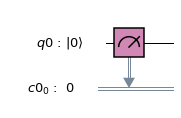

In [8]:
qc_ground.draw(output='mpl')

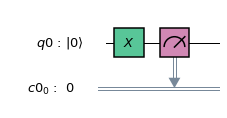

In [9]:
qc_excited.draw(output='mpl')

Here we have created two jobs with different quantum circuits; the first to prepare the ground state, and the second to prepare the excited state. Now we can run the prepared jobs.

In [10]:
circuits = [qc_ground, qc_excited]
job = execute(circuits, backend)
result = job.result()

After the run has been completed, the data can be extracted from the API output and plotted.

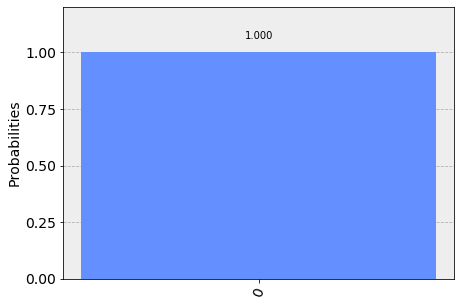

In [11]:
plot_histogram(result.get_counts(qc_ground))

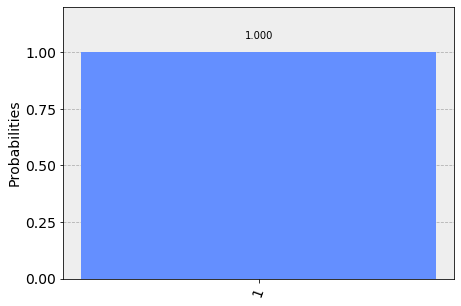

In [12]:
plot_histogram(result.get_counts(qc_excited))

Here we see that the qubit is in the $|0\rangle$ state with 100% probability for the first circuit and in the $|1\rangle$ state with 100% probability for the second circuit. If we had run on a quantum processor rather than the simulator, there would be a difference from the ideal perfect answer due to a combination of measurement error, preparation error, and gate error (for the $|1\rangle$ state). 

Up to this point, nothing is different from a classical system of a bit. To go beyond, we must explore what it means to make a superposition. The operation in the quantum circuit language for generating a superposition is the Hadamard gate, $H$. Let's assume for now that this gate is like flipping a fair coin. The result of a flip has two possible outcomes, heads or tails, each occurring with equal probability. If we repeat this simple thought experiment many times, we would expect that on average we will measure as many heads as we do tails. Let heads be $|0\rangle$ and tails be $|1\rangle$. 

Let's run the quantum version of this experiment. First we prepare the qubit in the ground state $|0\rangle$. We then apply the Hadamard gate (coin flip). Finally, we measure the state of the qubit. Repeat the experiment 1024 times (shots). As you likely predicted, half the outcomes will be in the $|0\rangle$ state and half will be in the $|1\rangle$ state.

Try the program below.

In [14]:
# Quantum circuit superposition 
qc_superposition = QuantumCircuit(qr, cr)
qc_superposition.h(qr)
breakpoint = qc_superposition.assert_uniform(qr, cr) # assertions: create breakpoint
qc_superposition.measure(qr[0], cr[0])

qc_superposition.draw()

True


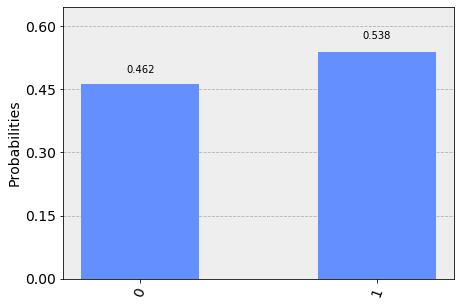

In [15]:
job = execute([breakpoint, qc_superposition], backend, shots = 1024) # assertions: execute the breakpoint
result = job.result()

passed = result.get_assertion_passed(breakpoint) # assertions: get the assertion result
print(passed)
assert(passed)
plot_histogram(result.get_counts(qc_superposition))

Indeed, much like a coin flip, the results are close to 50/50 with some non-ideality due to errors (again due to state preparation, measurement, and gate errors). So far, this is still not unexpected. Let's run the experiment again, but this time with two $H$ gates in succession. If we consider the $H$ gate to be analog to a coin flip, here we would be flipping it twice, and still expecting a 50/50 distribution. 

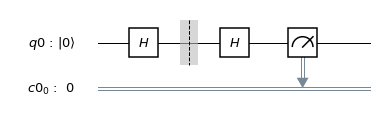

In [14]:
# Quantum circuit two Hadamards 
qc_twohadamard = QuantumCircuit(qr, cr)
qc_twohadamard.h(qr)
qc_twohadamard.barrier()
qc_twohadamard.h(qr)
qc_twohadamard.measure(qr[0], cr[0])

qc_twohadamard.draw(output='mpl')

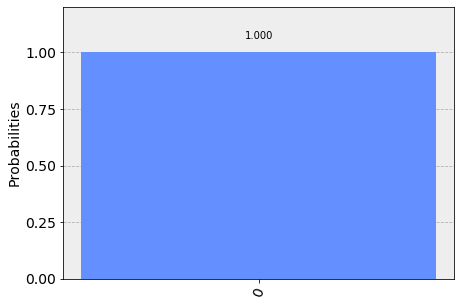

In [15]:
job = execute(qc_twohadamard, backend)
result = job.result()

plot_histogram(result.get_counts(qc_twohadamard))

This time, the results are surprising. Unlike the classical case, with high probability the outcome is not random, but in the $|0\rangle$ state. *Quantum randomness* is not simply like a classical random coin flip. In both of the above experiments, the system (without noise) is in a definite state, but only in the first case does it behave randomly. This is because, in the first case, via the $H$ gate, we make a uniform superposition of the ground and excited state, $(|0\rangle+|1\rangle)/\sqrt{2}$, but then follow it with a measurement in the computational basis. The act of measurement in the computational basis forces the system to be in either the $|0\rangle$ state or the $|1\rangle$ state with an equal probability (due to the uniformity of the superposition). In the second case, we can think of the second $H$ gate as being a part of the final measurement operation; it changes the measurement basis from the computational basis to a *superposition* basis. The following equations illustrate the action of the $H$ gate on the computational basis states:
$$H: |0\rangle  \rightarrow  |+\rangle=\frac{|0\rangle+|1\rangle}{\sqrt{2}}$$
$$H: |1\rangle \rightarrow |-\rangle=\frac{|0\rangle-|1\rangle}{\sqrt{2}}.$$
We can redefine this new transformed basis, the superposition basis, as the set {$|+\rangle$, $|-\rangle$}. We now have a different way of looking at the second experiment above. The first $H$ gate prepares the system into a superposition state, namely the $|+\rangle$ state. The second $H$ gate followed by the standard measurement changes it into a measurement in the superposition basis. If the measurement gives 0, we can conclude that the system was in the $|+\rangle$ state before the second $H$ gate, and if we obtain 1, it means the system was in the $|-\rangle$ state. In the above experiment we see that the outcome is mainly 0, suggesting that our system was in the $|+\rangle$ superposition state before the second $H$ gate. 


The math is best understood if we represent the quantum superposition state $|+\rangle$ and $|-\rangle$ by: 

$$|+\rangle =\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix}$$
$$|-\rangle =\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1 \end{pmatrix}$$

A standard measurement, known in quantum mechanics as a projective or von Neumann measurement, takes any superposition state of the qubit and projects it to either the state $|0\rangle$ or the state $|1\rangle$ with a probability determined by:

$$P(i|\psi) = |\langle i|\psi\rangle|^2$$ 

where $P(i|\psi)$ is the probability of measuring the system in state $i$ given preparation $\psi$.

We have written the Python function ```state_overlap``` to return this: 

In [16]:
state_overlap = lambda state1, state2: np.absolute(np.dot(state1.conj().T,state2))**2

Now that we have a simple way of going from a state to the probability distribution of a standard measurement, we can go back to the case of a superposition made from the Hadamard gate. The Hadamard gate is defined by the matrix:

$$ H =\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

The $H$ gate acting on the state $|0\rangle$ gives:

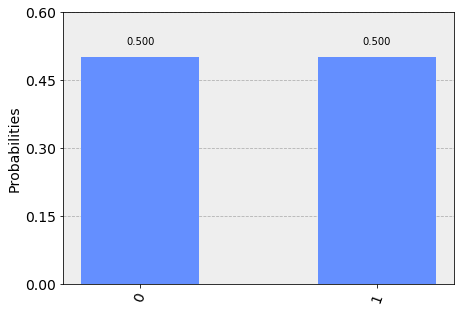

In [17]:
Hadamard = np.array([[1,1],[1,-1]],dtype=complex)/np.sqrt(2)
psi1 = np.dot(Hadamard,zero)
P0 = state_overlap(zero,psi1)
P1 = state_overlap(one,psi1)
plot_histogram({'0' : P0.item(0), '1' : P1.item(0)})

which is the ideal version of the first superposition experiment. 

The second experiment involves applying the Hadamard gate twice. While matrix multiplication shows that the product of two Hadamards is the identity operator (meaning that the state $|0\rangle$ remains unchanged), here (as previously mentioned) we prefer to interpret this as doing a measurement in the superposition basis. Using the above definitions, you can show that $H$ transforms the computational basis to the superposition basis.

In [18]:
print(np.dot(Hadamard,zero))
print(np.dot(Hadamard,one))

[[0.70710678+0.j]
 [0.70710678+0.j]]
[[ 0.70710678+0.j]
 [-0.70710678+0.j]]


This is just the beginning of how a quantum state differs from a classical state. Please continue to [Amplitude and Phase](amplitude_and_phase.ipynb) to explore further!